In [42]:
import pyodbc

# Thông tin kết nối
connection_string = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-778PBH1\HOAIHUESQL;'
    'DATABASE=chotot;'
    'UID=sa;'
    'PWD=123;'
)

# Kết nối đến SQL Server
conn = pyodbc.connect(connection_string)


In [44]:
import pandas as pd
# Lấy dữ liệu từ các bảng
san_pham_query = "SELECT * FROM SanPham;"
cua_hang_query = "SELECT * FROM CuaHang;"
hang_query = "SELECT * FROM Hang;"
dong_may_query = "SELECT * FROM DongMay;"

# Đọc dữ liệu vào DataFrame
san_pham_df = pd.read_sql(san_pham_query, conn)
cua_hang_df = pd.read_sql(cua_hang_query, conn)
hang_df = pd.read_sql(hang_query, conn)
dong_may_df = pd.read_sql(dong_may_query, conn)

# Kiểm tra xem dữ liệu có được tải thành công không
print(san_pham_df.head())
#Đóng kết nối
conn.close()

   SanPhamId                                         TenSanPham      Gia  \
0          1  Motorola G Styplus 5G (2023) - Hỗ trợ Bút cản ứng  2750000   
1          2  Xiaomi Redmi K50 Ultra 5G Snap 8+ gen1 Góp Online  4890000   
2          3      Xiaomi Mi 10S Snap 870 Likenew_Trả góp Online  3990000   
3          4   Xiaomi 12 Pro Snap 8 Gen 1 Likenew | Góp Tại Nhà  5890000   
4          5   Xiaomi 12 Pro Snap 8 Gen 1 Likenew | Góp Tại Nhà  5890000   

   DongMayId  HangId  CuaHangId                   TinhTrang ChinhSachBaoHanh  \
0        521       6        527  Đã sử dụng (chưa sửa chữa)     Còn bảo hành   
1        626       9        391                         Mới     Còn bảo hành   
2        487       9        391  Đã sử dụng (chưa sửa chữa)     Còn bảo hành   
3         10       9        391  Đã sử dụng (chưa sửa chữa)     Còn bảo hành   
4         11       9        391  Đã sử dụng (chưa sửa chữa)     Còn bảo hành   

       MauSac                                               Li

C:\Users\HOAI HUE\AppData\Local\Temp\ipykernel_6428\2098834320.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  san_pham_df = pd.read_sql(san_pham_query, conn)
C:\Users\HOAI HUE\AppData\Local\Temp\ipykernel_6428\2098834320.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cua_hang_df = pd.read_sql(cua_hang_query, conn)
C:\Users\HOAI HUE\AppData\Local\Temp\ipykernel_6428\2098834320.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  hang_df = pd.read_sql(hang_query, conn)
C:\Users\HOAI HUE\AppData\Local\Temp\ipykernel

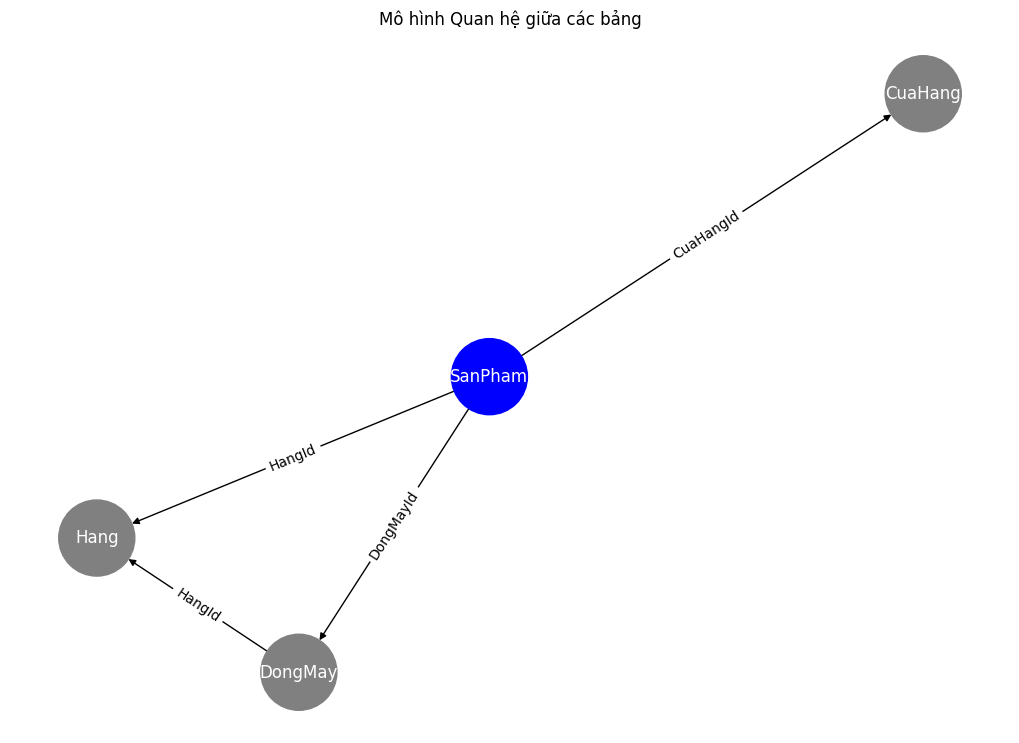

In [12]:
from sqlalchemy import create_engine
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
# Tạo một đồ thị để biểu diễn mối quan hệ
G = nx.DiGraph()

# Thêm các nút (tên bảng)
G.add_node("SanPham", color='blue')
G.add_node("DongMay", color='gray')
G.add_node("Hang", color='gray')
G.add_node("CuaHang", color='gray')

# Thêm các cạnh (quan hệ giữa các bảng)
G.add_edge("SanPham", "DongMay", relationship="DongMayId")
G.add_edge("SanPham", "Hang", relationship="HangId")
G.add_edge("SanPham", "CuaHang", relationship="CuaHangId")
G.add_edge("DongMay", "Hang", relationship="HangId")

# Vẽ biểu đồ
pos = nx.spring_layout(G)  # Layout của đồ thị
colors = [G.nodes[node].get('color', 'gray') for node in G.nodes]

plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=3000, font_size=12, font_color='white')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['relationship'] for u, v, d in G.edges(data=True)})
plt.title("Mô hình Quan hệ giữa các bảng")
plt.show()


C:\Users\HOAI HUE\AppData\Local\Temp\ipykernel_26912\90347447.py:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Đảm bảo biểu đồ không bị cắt


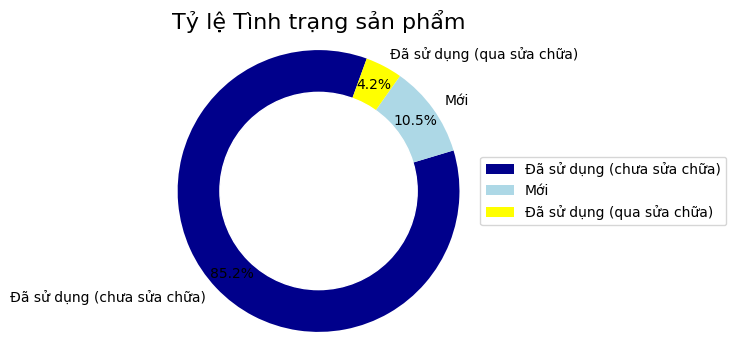

In [25]:
import matplotlib.pyplot as plt

# Giả sử df_sanpham đã được đọc từ cơ sở dữ liệu và có cột 'TinhTrang'
# Tính toán tỷ lệ các giá trị trong cột 'TinhTrang'
tinhtrang_frequency = san_pham_df['TinhTrang'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(4, 4))  # Điều chỉnh kích thước biểu đồ
colors = ['darkblue', 'lightblue', 'yellow', 'green', 'red']  # Chọn màu sắc từ đậm sang nhạt

# Vẽ biểu đồ tròn với chú thích gần biểu đồ
plt.pie(tinhtrang_frequency, labels=tinhtrang_frequency.index, autopct='%1.1f%%', startangle=70, colors=colors, pctdistance=0.85)

# Tạo vòng tròn ở giữa để tạo hiệu ứng donut (nếu muốn)
centre_circle = plt.Circle((0,0), 0.70, color='white', fc='white') 
plt.gca().add_artist(centre_circle)

# Thêm tiêu đề
plt.title('Tỷ lệ Tình trạng sản phẩm', fontsize=16)

# Di chuyển chú thích gần biểu đồ tròn
plt.legend(tinhtrang_frequency.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Đảm bảo biểu đồ tròn
plt.axis('equal')  
plt.tight_layout()  # Đảm bảo biểu đồ không bị cắt
plt.show()


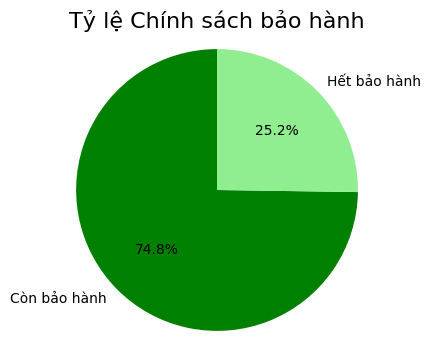

In [26]:
# Tính toán tỷ lệ các giá trị trong cột 'ChinhSachBaoHanh'
chinh_sach_bao_hanh_frequency = san_pham_df['ChinhSachBaoHanh'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(4, 4))
plt.pie(chinh_sach_bao_hanh_frequency, 
        labels=chinh_sach_bao_hanh_frequency.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['green', 'lightgreen'])
plt.title('Tỷ lệ Chính sách bảo hành', fontsize=16)
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

C:\Users\HOAI HUE\AppData\Local\Temp\ipykernel_26912\3830240745.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, mau_sac_frequency[i] + 25, str(mau_sac_frequency[i]),ha='center', color='black', fontsize=10)


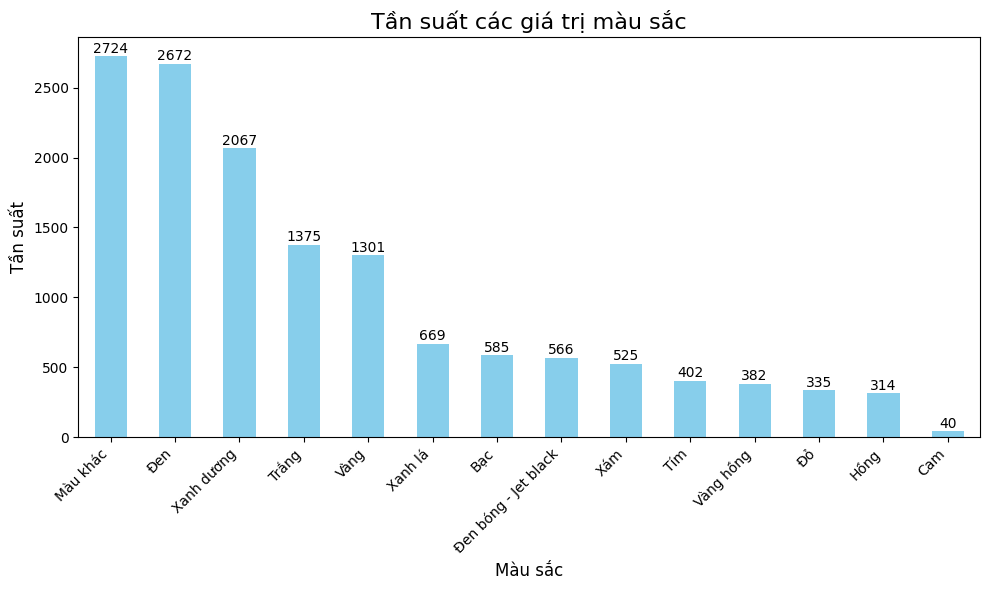

In [27]:
# Tính toán tần suất các giá trị trong cột 'MauSac'
mau_sac_frequency = san_pham_df['MauSac'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
mau_sac_frequency.plot(kind='bar', color='skyblue')

# Hiển thị số liệu lên trên các cột
for i in range(len(mau_sac_frequency)):
    plt.text(i, mau_sac_frequency[i] + 25, str(mau_sac_frequency[i]),ha='center', color='black', fontsize=10)

# Đặt tiêu đề và nhãn trục
plt.title('Tần suất các giá trị màu sắc', fontsize=16)
plt.xlabel('Màu sắc', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)

# Xoay nhãn trục x cho dễ đọc
plt.xticks(rotation=45, ha='right')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

C:\Users\HOAI HUE\AppData\Local\Temp\ipykernel_26912\2341844340.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_price_by_brand_sorted, x='TenHang', y='Gia', palette='viridis')


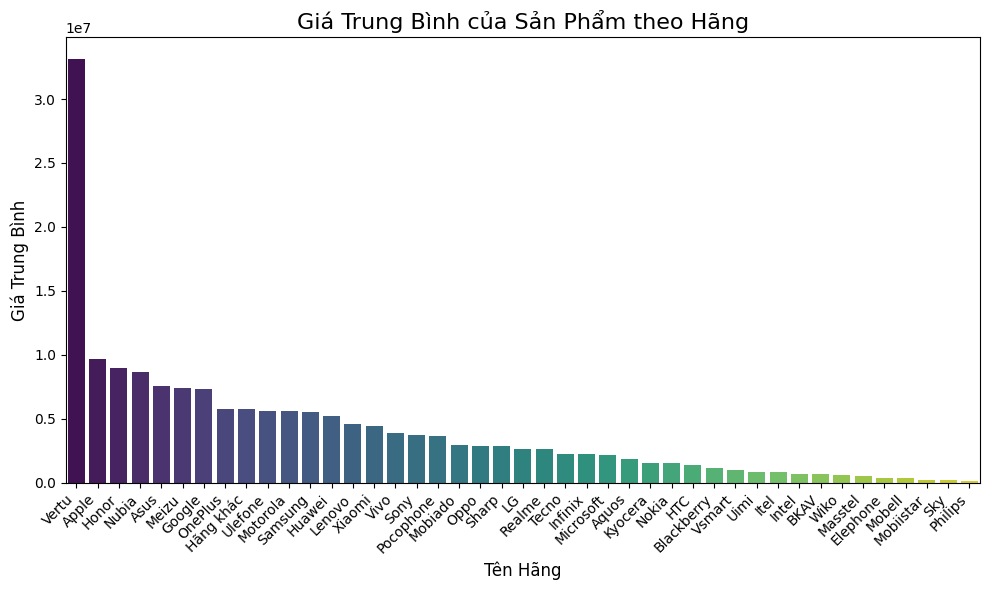

In [22]:
# Bước 1: Chuyển cột 'Gia' về kiểu dữ liệu số (float)
san_pham_df['Gia'] = pd.to_numeric(san_pham_df['Gia'], errors='coerce')

# Bước 2: Lấy giá trị trung bình của sản phẩm theo từng hãng
average_price_by_brand = san_pham_df.groupby('HangId')['Gia'].mean().reset_index()

# Bước 3: Kết hợp tên hãng từ bảng Hang vào bảng kết quả trung bình giá
# Sử dụng thông tin từ bảng Hang thông qua mapping
hang_dict = dict(zip(hang_df['HangId'], hang_df['TenHang']))

# Thêm cột "TenHang" từ hang_dict vào kết quả
average_price_by_brand['TenHang'] = average_price_by_brand['HangId'].map(hang_dict)

# Bước 4: Sắp xếp theo giá trung bình giảm dần
average_price_by_brand_sorted = average_price_by_brand.sort_values(by='Gia', ascending=False)

# Bước 5: Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(data=average_price_by_brand_sorted, x='TenHang', y='Gia', palette='viridis')

# Thêm tiêu đề và nhãn cho trục
plt.title('Giá Trung Bình của Sản Phẩm theo Hãng', fontsize=16)
plt.xlabel('Tên Hãng', fontsize=12)
plt.ylabel('Giá Trung Bình', fontsize=12)

# Xoay nhãn trục x để dễ đọc
plt.xticks(rotation=45, ha='right')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

C:\Users\HOAI HUE\AppData\Local\Temp\ipykernel_26912\318132030.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=san_pham_df, x='TenHang', y='Gia', palette='viridis')


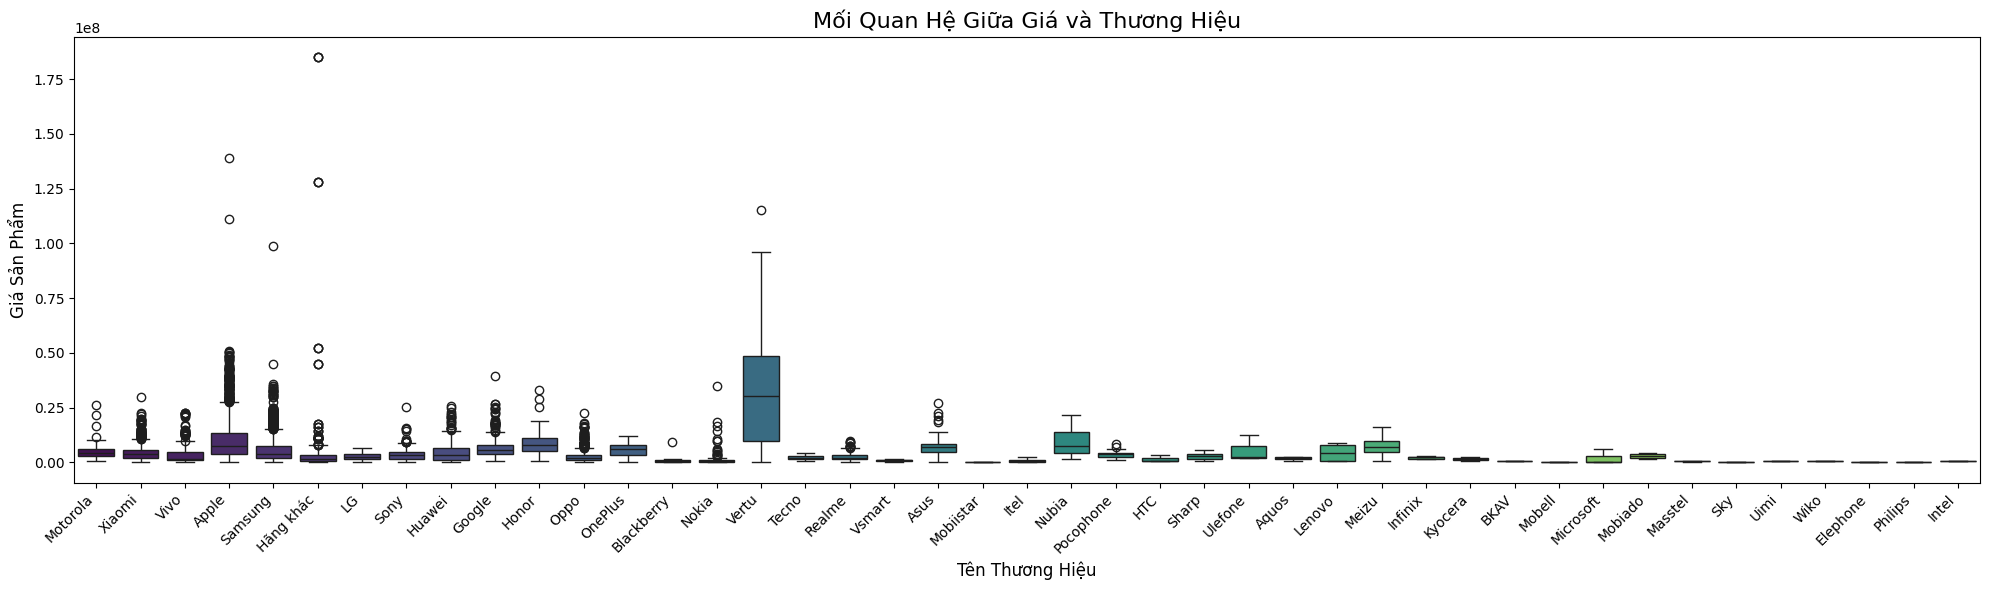

In [24]:
# Bước 1: Chuyển cột 'Gia' về kiểu dữ liệu số (float)
san_pham_df['Gia'] = pd.to_numeric(san_pham_df['Gia'], errors='coerce')

# Bước 2: Ánh xạ tên thương hiệu vào bảng sản phẩm
# Sử dụng thông tin từ bảng Hang qua map
hang_dict = dict(zip(hang_df['HangId'], hang_df['TenHang']))
san_pham_df['TenHang'] = san_pham_df['HangId'].map(hang_dict)

# Bước 3: Vẽ biểu đồ boxplot để thể hiện mối quan hệ giữa giá và thương hiệu
plt.figure(figsize=(20, 6))
sns.boxplot(data=san_pham_df, x='TenHang', y='Gia', palette='viridis')

# Thêm tiêu đề và nhãn cho trục
plt.title('Mối Quan Hệ Giữa Giá và Thương Hiệu', fontsize=16)
plt.xlabel('Tên Thương Hiệu', fontsize=12)
plt.ylabel('Giá Sản Phẩm', fontsize=12)

# Xoay nhãn trục x để dễ đọc
plt.xticks(rotation=45, ha='right')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

C:\Users\HOAI HUE\AppData\Local\Temp\ipykernel_26912\3193455741.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_models, x='TenDongMay', y='Gia', palette='viridis')


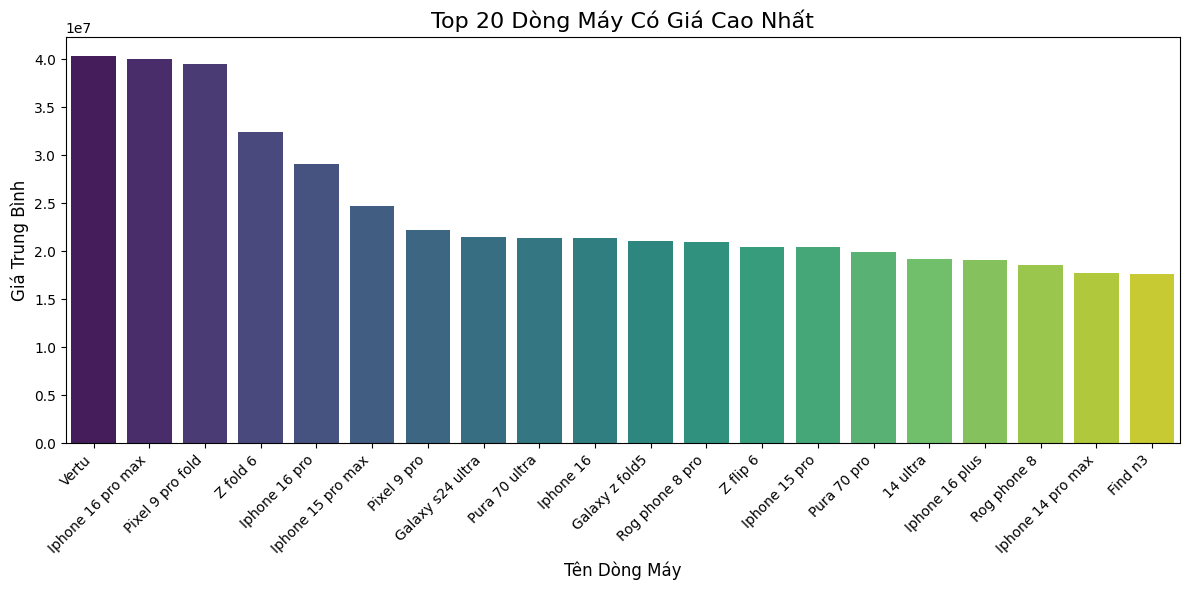

In [28]:
# Bước 2: Ánh xạ tên dòng máy vào bảng sản phẩm
# Sử dụng thông tin từ bảng DongMay qua map
dong_may_dict = dict(zip(dong_may_df['DongMayId'], dong_may_df['TenDongMay']))
san_pham_df['TenDongMay'] = san_pham_df['DongMayId'].map(dong_may_dict)

# Bước 3: Tính giá trung bình của từng dòng máy và sắp xếp theo giá giảm dần
average_price_by_model = san_pham_df.groupby('TenDongMay')['Gia'].mean().reset_index()

# Bước 4: Lọc ra top 20 dòng máy có giá cao nhất
top_20_models = average_price_by_model.sort_values(by='Gia', ascending=False).head(20)

# Bước 5: Vẽ biểu đồ cột cho top 20 dòng máy
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_models, x='TenDongMay', y='Gia', palette='viridis')

# Thêm tiêu đề và nhãn cho trục
plt.title('Top 20 Dòng Máy Có Giá Cao Nhất', fontsize=16)
plt.xlabel('Tên Dòng Máy', fontsize=12)
plt.ylabel('Giá Trung Bình', fontsize=12)

# Xoay nhãn trục x để dễ đọc
plt.xticks(rotation=45, ha='right')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

C:\Users\HOAI HUE\AppData\Local\Temp\ipykernel_26912\2920412197.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TinhTrang', y='Gia', data=san_pham_df, palette='Set2')


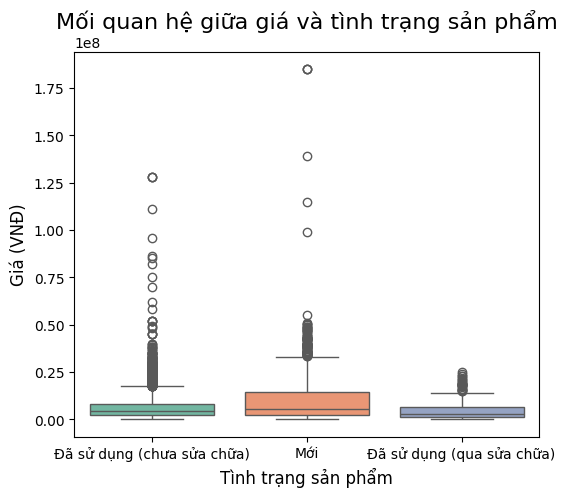

In [29]:
# Vẽ biểu đồ hộp (boxplot) thể hiện mối quan hệ giữa giá và tình trạng sản phẩm
plt.figure(figsize=(6, 5))
sns.boxplot(x='TinhTrang', y='Gia', data=san_pham_df, palette='Set2')

# Thêm tiêu đề và nhãn cho các trục
plt.title('Mối quan hệ giữa giá và tình trạng sản phẩm', fontsize=16)
plt.xlabel('Tình trạng sản phẩm', fontsize=12)
plt.ylabel('Giá (VNĐ)', fontsize=12)

# Đặt xoay cho nhãn trục X nếu cần
plt.xticks(rotation=360, ha='center')

# Hiển thị biểu đồ
plt.show()

C:\Users\HOAI HUE\AppData\Local\Temp\ipykernel_26912\489651591.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TinhTrang', y='Gia', data=san_pham_df, palette='Set2')


<Axes: xlabel='TinhTrang', ylabel='Gia'>

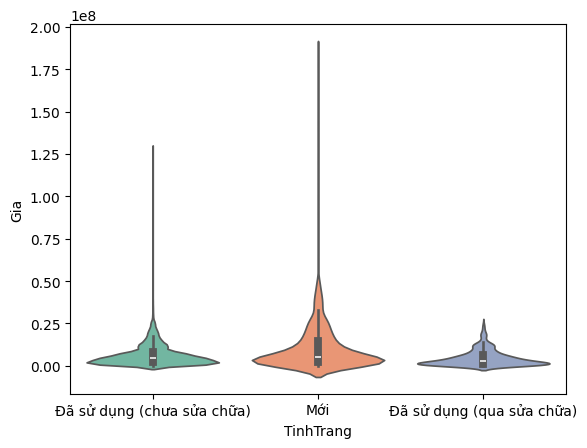

In [31]:
sns.violinplot(x='TinhTrang', y='Gia', data=san_pham_df, palette='Set2')

C:\Users\HOAI HUE\AppData\Local\Temp\ipykernel_26912\3164843207.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_condition.index, y=avg_price_by_condition.values, palette='coolwarm')


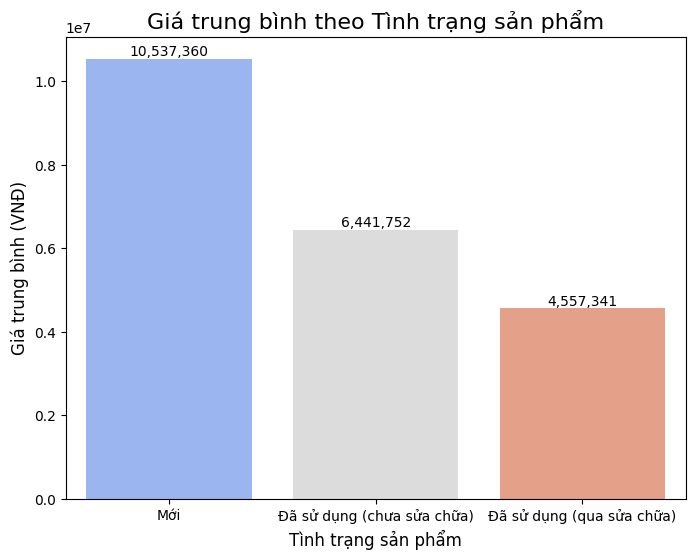

In [32]:
# Tính giá trung bình theo tình trạng sản phẩm
avg_price_by_condition = san_pham_df.groupby('TinhTrang')['Gia'].mean()

# Vẽ biểu đồ cột (bar plot) cho giá trung bình theo tình trạng sản phẩm
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_price_by_condition.index, y=avg_price_by_condition.values, palette='coolwarm')

# Thêm số liệu cụ thể lên các cột
for i, value in enumerate(avg_price_by_condition.values):
    plt.text(i, value, f"{value:,.0f}", ha='center', va='bottom', fontsize=10, color='black')

# Thêm tiêu đề và nhãn cho các trục
plt.title('Giá trung bình theo Tình trạng sản phẩm', fontsize=16)
plt.xlabel('Tình trạng sản phẩm', fontsize=12)
plt.ylabel('Giá trung bình (VNĐ)', fontsize=12)

# Hiển thị biểu đồ
plt.show()

C:\Users\HOAI HUE\AppData\Local\Temp\ipykernel_26912\1334216214.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_warranty.index, y=avg_price_by_warranty.values, palette='Set2')


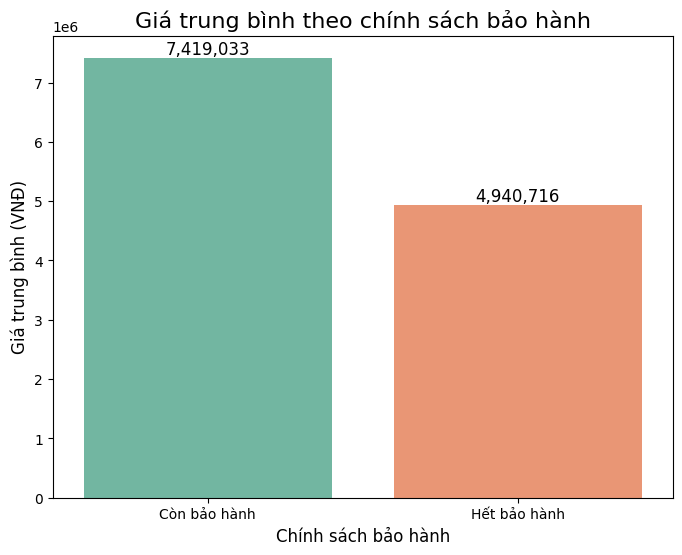

In [34]:
# Tính trung bình giá theo chính sách bảo hành
avg_price_by_warranty = san_pham_df.groupby('ChinhSachBaoHanh')['Gia'].mean()

# Vẽ biểu đồ cột (bar plot) cho giá trung bình theo chính sách bảo hành
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_price_by_warranty.index, y=avg_price_by_warranty.values, palette='Set2')

# Thêm tiêu đề và nhãn cho các trục
plt.title('Giá trung bình theo chính sách bảo hành', fontsize=16)
plt.xlabel('Chính sách bảo hành', fontsize=12)
plt.ylabel('Giá trung bình (VNĐ)', fontsize=12)

# Hiển thị giá trị trung bình lên trên các cột
for i, value in enumerate(avg_price_by_warranty.values):
    plt.text(i, value + 50000, f'{value:,.0f}', ha='center', fontsize=12, color='black')

# Hiển thị biểu đồ
plt.show()

C:\Users\HOAI HUE\AppData\Local\Temp\ipykernel_26912\2067375015.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_color.index, y=avg_price_by_color.values, palette='Set2')


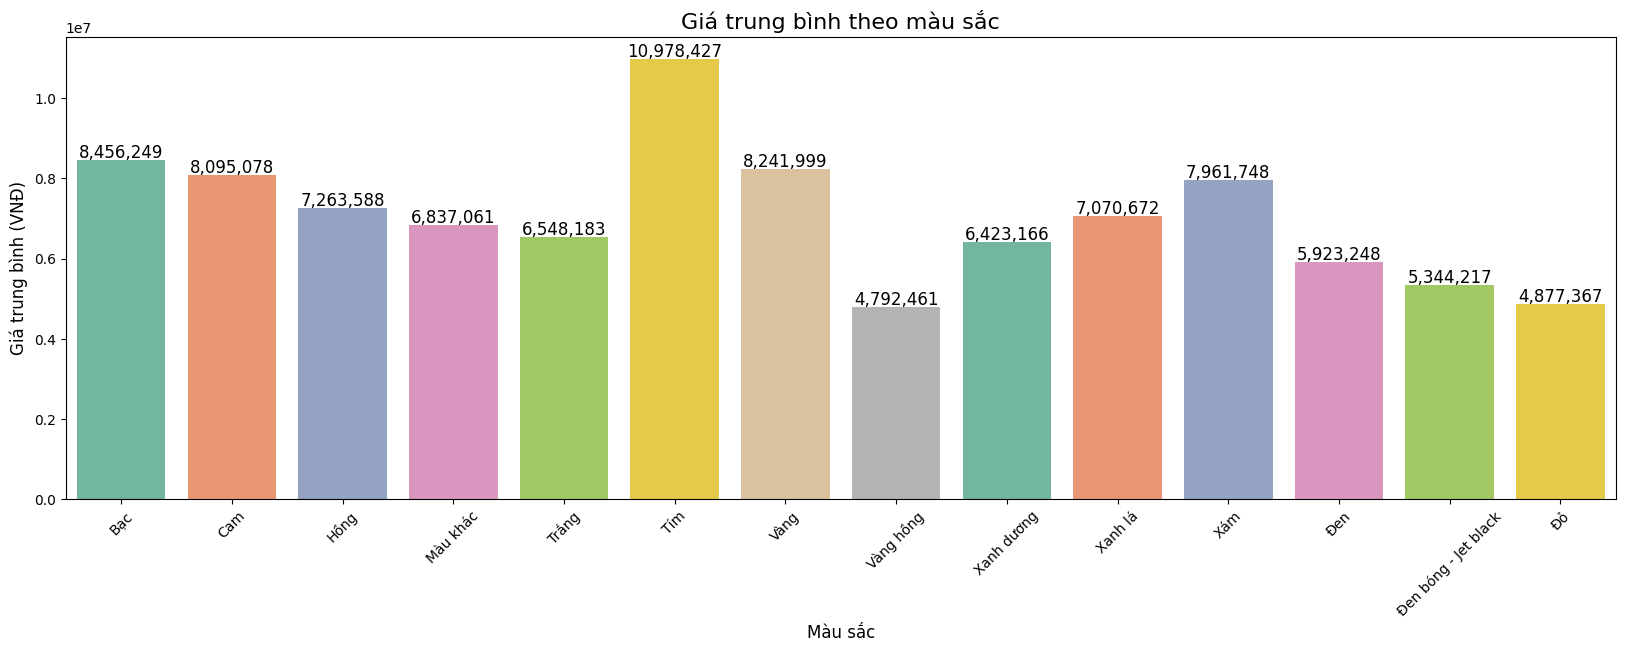

In [35]:
# Tính trung bình giá theo màu sắc
avg_price_by_color = san_pham_df.groupby('MauSac')['Gia'].mean()

# Vẽ biểu đồ cột (bar plot) cho giá trung bình theo màu sắc
plt.figure(figsize=(20, 6))
sns.barplot(x=avg_price_by_color.index, y=avg_price_by_color.values, palette='Set2')

# Thêm tiêu đề và nhãn cho các trục
plt.title('Giá trung bình theo màu sắc', fontsize=16)
plt.xlabel('Màu sắc', fontsize=12)
plt.ylabel('Giá trung bình (VNĐ)', fontsize=12)

# Hiển thị giá trị trung bình lên trên các cột
for i, value in enumerate(avg_price_by_color.values):
    plt.text(i, value + 50000, f'{value:,.0f}', ha='center', fontsize=12, color='black')

# Hiển thị biểu đồ
plt.xticks(rotation=45)  # Xoay nhãn màu sắc nếu cần thiết
plt.show()

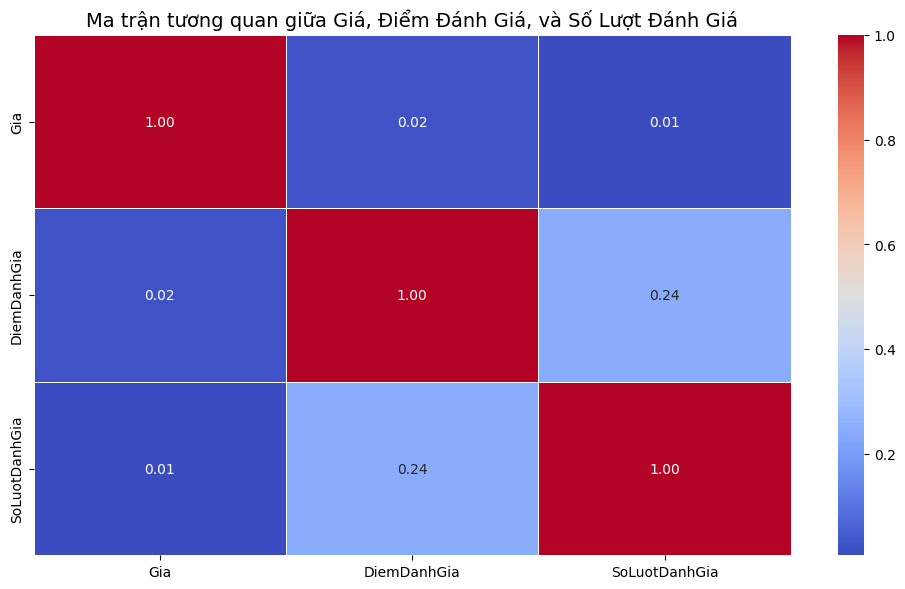

In [36]:
# Bước 2: Giả sử bảng 'CuaHang' chứa thông tin về đánh giá, thêm cột 'DiemDanhGia' và 'SoLuotDanhGia'
# Chúng ta sẽ ánh xạ các cột này vào bảng SanPham thông qua CuaHangId
san_pham_df['DiemDanhGia'] = san_pham_df['CuaHangId'].map(dict(zip(cua_hang_df['CuaHangId'], cua_hang_df['DiemDanhGia'])))
san_pham_df['SoLuotDanhGia'] = san_pham_df['CuaHangId'].map(dict(zip(cua_hang_df['CuaHangId'], cua_hang_df['SoLuotDanhGia'])))

# Bước 3: Tính toán ma trận tương quan giữa các biến
correlation_matrix = san_pham_df[['Gia', 'DiemDanhGia', 'SoLuotDanhGia']].corr()

# Bước 4: Vẽ biểu đồ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Ma trận tương quan giữa Giá, Điểm Đánh Giá, và Số Lượt Đánh Giá', fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\HOAI HUE\AppData\Local\Temp\ipykernel_26912\792503583.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='DiemDanhGia', y='Gia', data=san_pham_df, palette='Set1')


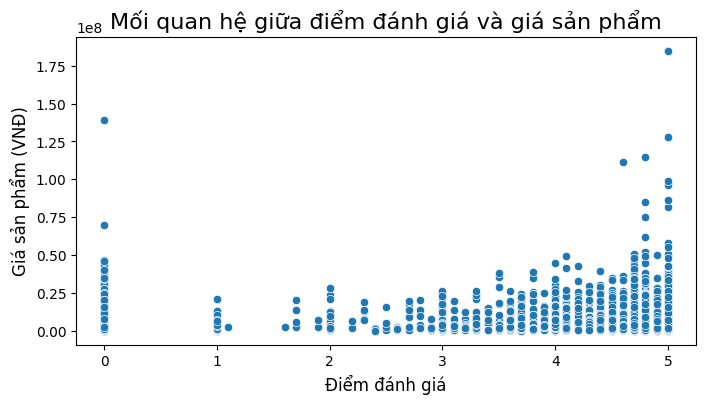

In [37]:
# Bước 2: Ánh xạ điểm đánh giá và số lượt đánh giá từ bảng CuaHang
san_pham_df['DiemDanhGia'] = san_pham_df['CuaHangId'].map(dict(zip(cua_hang_df['CuaHangId'], cua_hang_df['DiemDanhGia'])))
san_pham_df['SoLuotDanhGia'] = san_pham_df['CuaHangId'].map(dict(zip(cua_hang_df['CuaHangId'], cua_hang_df['SoLuotDanhGia'])))

# Bước 3: Loại bỏ các dòng có giá trị thiếu (NaN) trong cột 'DiemDanhGia' và 'Gia'
san_pham_df = san_pham_df.dropna(subset=['DiemDanhGia', 'Gia'])

# Bước 4: Vẽ biểu đồ phân tán (scatter plot) để phân tích mối quan hệ giữa điểm đánh giá và giá sản phẩm
plt.figure(figsize=(8, 4))
sns.scatterplot(x='DiemDanhGia', y='Gia', data=san_pham_df, palette='Set1')

# Thêm tiêu đề và nhãn cho các trục
plt.title('Mối quan hệ giữa điểm đánh giá và giá sản phẩm', fontsize=16)
plt.xlabel('Điểm đánh giá', fontsize=12)
plt.ylabel('Giá sản phẩm (VNĐ)', fontsize=12)

# Hiển thị biểu đồ
plt.show()